In [5]:
from google.colab import files

uploaded = files.upload()


Saving sms+spam+collection.zip to sms+spam+collection.zip


In [6]:
import zipfile
import os


zip_file = next(iter(uploaded))

# Extract the ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("Extraction complete! Files extracted to /content/")



Extraction complete! Files extracted to /content/


In [7]:
os.listdir("/content/")


['.config',
 'SMSSpamCollection',
 'readme',
 '.ipynb_checkpoints',
 'sms+spam+collection.zip',
 'sample_data']

In [10]:
files.download("/content/SMSSpamCollection")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import nltk
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


random.seed(99)


import warnings
warnings.filterwarnings("ignore")


nltk.download("stopwords")

# Load the dataset
file_name = "SMSSpamCollection"
df = pd.read_csv(file_name, delimiter="\t", header=None, names=["category", "message"])

# Display initial insights
print("First few records of the dataset:")
display(df.head())

print("\nColumns available in the dataset:", df.columns.tolist())
print("Total records:", df.shape)

# Checking category distribution
print("\nDistribution of message categories:")
print(df['category'].value_counts())

# Compute spam vs. ham percentages
spam_count = df[df['category'] == 'spam'].shape[0]
ham_count = df[df['category'] == 'ham'].shape[0]
spam_ratio = (spam_count / (spam_count + ham_count)) * 100
ham_ratio = (ham_count / (spam_count + ham_count)) * 100

print(f"\nSpam percentage: {spam_ratio:.2f}%")
print(f"Ham percentage: {ham_ratio:.2f}%")

def clean_message(text):
    """
    Processes SMS messages by:
    - Lowercasing
    - Removing non-alphabetic characters (except spaces and periods)
    - Tokenizing and removing common stopwords
    """
    text = text.lower()
    text = re.sub(r"[^a-z .]", "", text)  # Keep only letters, spaces, and periods
    words = text.split()
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return " ".join(words)

print("\nStarting text preprocessing...\n")
df["processed_text"] = df["message"].apply(clean_message)

print("Text cleaning complete. Sample output:")
display(df.head(5))

# Splitting into training, validation, and test sets
train_data, temp_data = train_test_split(df[["processed_text", "category"]], test_size=0.30, random_state=99)
val_data, test_data = train_test_split(temp_data, test_size=0.50, random_state=99)

# Printing dataset sizes
print("Training set size   :", train_data.shape)
print("Validation set size :", val_data.shape)
print("Test set size       :", test_data.shape)

# Save to files
train_data.to_csv("train_sms.csv", index=False)
val_data.to_csv("val_sms.csv", index=False)
test_data.to_csv("test_sms.csv", index=False)

print("\nData partitions saved as:")
print("  - train_sms.csv")
print("  - val_sms.csv")
print("  - test_sms.csv")


First few records of the dataset:


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



Columns available in the dataset: ['category', 'message']
Total records: (5572, 2)

Distribution of message categories:
category
ham     4825
spam     747
Name: count, dtype: int64

Spam percentage: 13.41%
Ham percentage: 86.59%

Starting text preprocessing...

Text cleaning complete. Sample output:


,category,message,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point available bugis n great world ...
1,ham,Ok lar... Joking wif u oni...,ok joking wif u
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early u c already
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


Training set size   : (3900, 2)
Validation set size : (836, 2)
Test set size       : (836, 2)

Data partitions saved as:
  - train_sms.csv
  - val_sms.csv
  - test_sms.csv


Download the Processed Text File

In [12]:
from google.colab import files

# Save and download the processed dataset
df.to_csv("processed_sms_spam.csv", index=False)

# Trigger download
files.download("processed_sms_spam.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Libraries successfully imported!
Data loaded:
 - Dataset shape: (5572, 2)
 - Training set shape: (3900, 2)
 - Validation set shape: (836, 2)
 - Test set shape: (836, 2)
 - Test set shape: (836, 2)

Features and labels defined for training, validation, and testing.

--- Training Naive Bayes ---


Performance on Validation Set (Naive Bayes):
 - Accuracy:  98.68%
 - Precision: 96.40%
 - Recall:    93.86%
 - F1 Score:  95.11%



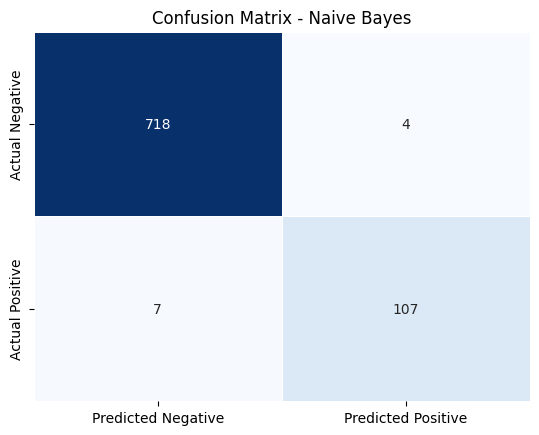


--- Training Logistic Regression ---


Performance on Validation Set (Logistic Regression):
 - Accuracy:  98.33%
 - Precision: 96.30%
 - Recall:    91.23%
 - F1 Score:  93.69%



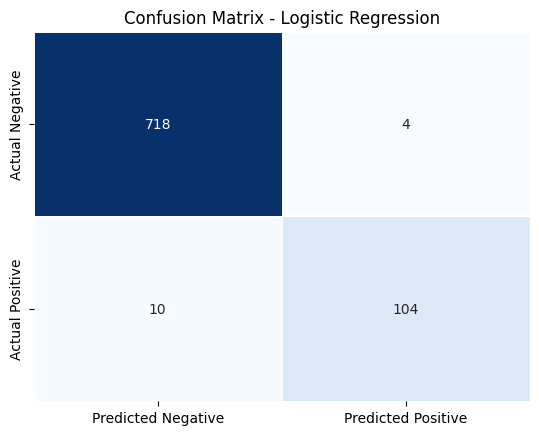


--- Training Random Forest ---


Performance on Validation Set (Random Forest):
 - Accuracy:  97.73%
 - Precision: 97.98%
 - Recall:    85.09%
 - F1 Score:  91.08%



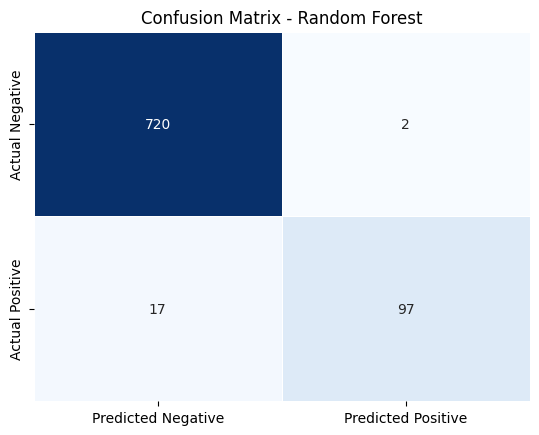


--- Training SVM ---


Performance on Validation Set (SVM):
 - Accuracy:  97.97%
 - Precision: 97.09%
 - Recall:    87.72%
 - F1 Score:  92.17%



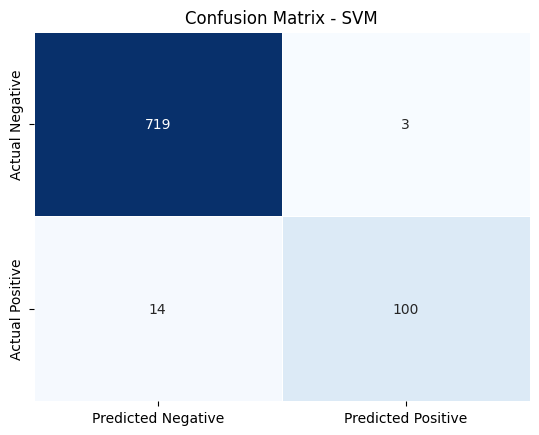


--- Final Evaluation on Test Set ---


--- Naive Bayes ---
 - Accuracy:  98.21%
 - Precision: 96.33%
 - Recall:    90.52%
 - F1 Score:  93.33%



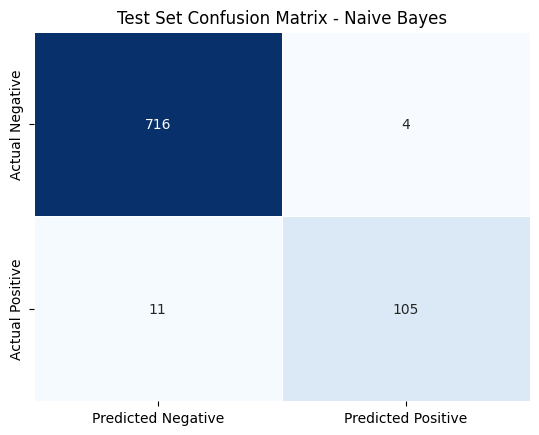


--- Logistic Regression ---
 - Accuracy:  97.73%
 - Precision: 97.09%
 - Recall:    86.21%
 - F1 Score:  91.32%



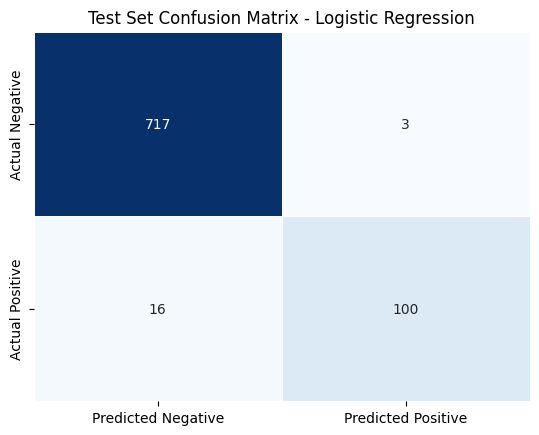


--- Random Forest ---
 - Accuracy:  97.13%
 - Precision: 97.92%
 - Recall:    81.03%
 - F1 Score:  88.68%



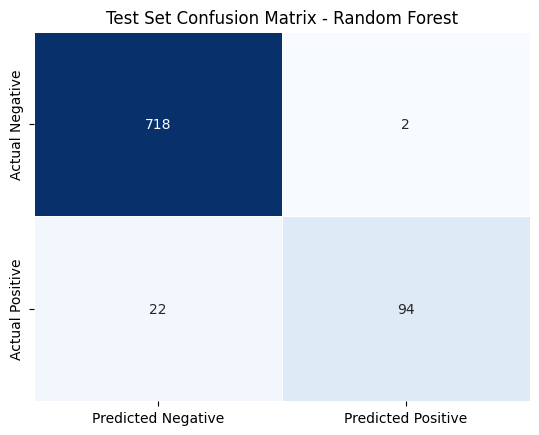


--- SVM ---
 - Accuracy:  97.73%
 - Precision: 98.02%
 - Recall:    85.34%
 - F1 Score:  91.24%



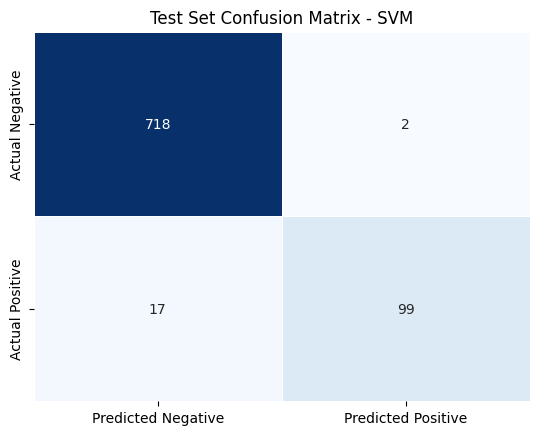

In [27]:
import nltk
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import metrics

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier


import random
random.seed(2023)

import seaborn as sns
import matplotlib.pyplot as plt
import re

nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

print("Libraries successfully imported!")

# Loading dataset
df = pd.read_csv("SMSSpamCollection", delimiter="	", header=None, names=["category", "message"])

print("Data loaded:")
print(f" - Dataset shape: {df.shape}")
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=99)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=99)
print(f" - Training set shape: {train_df.shape}")
print(f" - Validation set shape: {val_df.shape}")
print(f" - Test set shape: {test_df.shape}")
print(f" - Test set shape: {test_df.shape}")

# Feature-label assignment
X_train, y_train = train_df["message"], np.array(train_df["category"].map({'ham': 0, 'spam': 1}))
X_val, y_val = val_df["message"], np.array(val_df["category"].map({'ham': 0, 'spam': 1}))
X_test, y_test = test_df["message"], np.array(test_df["category"].map({'ham': 0, 'spam': 1}))

print("\nFeatures and labels defined for training, validation, and testing.")

# Custom metric functions
def display_conf_matrix(preds, true_labels, title):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.show()

# Model training
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(random_state=2023),
    "Random Forest": RandomForestClassifier(random_state=2023, max_depth=100),
    "SVM": SVC(random_state=2023),


}

def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    pipeline = make_pipeline(CountVectorizer(), model)
    pipeline.fit(X_train, y_train)
    val_preds = pipeline.predict(X_val)
    print(f"\nPerformance on Validation Set ({model_name}):")
    print(f" - Accuracy:  {accuracy_score(y_val, val_preds)*100:.2f}%")
    print(f" - Precision: {metrics.precision_score(y_val, val_preds)*100:.2f}%")
    print(f" - Recall:    {metrics.recall_score(y_val, val_preds)*100:.2f}%")
    print(f" - F1 Score:  {metrics.f1_score(y_val, val_preds)*100:.2f}%\n")
    display_conf_matrix(val_preds, y_val, f"Confusion Matrix - {model_name}")
    return pipeline

best_pipelines = {}
for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---\n")

    best_pipelines[model_name] = evaluate_model(model, X_train, y_train, X_val, y_val, model_name)

# Final evaluation on test set
print("\n--- Final Evaluation on Test Set ---\n")
for model_name, pipeline in best_pipelines.items():

    test_preds = pipeline.predict(X_test)
    print(f"\n--- {model_name} ---")
    print(f" - Accuracy:  {accuracy_score(y_test, test_preds)*100:.2f}%")
    print(f" - Precision: {metrics.precision_score(y_test, test_preds)*100:.2f}%")
    print(f" - Recall:    {metrics.recall_score(y_test, test_preds)*100:.2f}%")
    print(f" - F1 Score:  {metrics.f1_score(y_test, test_preds)*100:.2f}%\n")
    display_conf_matrix(test_preds, y_test, f"Test Set Confusion Matrix - {model_name}")




Ranking the Remaining Models:
Logistic Regression and SVM have identical Accuracy (97.73%).
SVM has the highest Precision (98.02%), meaning it avoids false positives well.
Logistic Regression has better Recall (86.21%), meaning it catches spam slightly better than SVM (85.34%).
Random Forest has the lowest Recall (81.03%), making it the weakest in detecting spam.
Final Verdict:
SVM is the second-best model after Naive Bayes because it offers:

Highest Precision (98.02%), meaning fewer false positives.
Good Accuracy (97.73%), similar to Logistic Regression.
Slightly lower Recall than Logistic Regression, but still strong.
Final Ranking:
 Best Model → Naive Bayes
 Second Best → SVM
 Third Best → Logistic Regression
 Least Effective → Random Forest
If your priority is overall performance, go with Naive Bayes. If you need a model that minimizes false positives, SVM is the next best choice.